In [159]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [160]:
 import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-17 23:01:55.951275+05:30


In [161]:
################################ IMPORTING LIBRARIES ############################

!pip install plotly_express

import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import pandas
import matplotlib.pyplot as plt
%matplotlib inline


import os
os.chdir('/gdrive/My Drive/Hackathon/Analyticsvidya-JanataHack Mobility Analytics/Raw Files/')

!pip install researchpy

In [162]:
!ls -lrt

total 49837
-rw------- 1 root root  1310951 May 17 04:15 sample_submission_NoPBkjr.csv
-rw------- 1 root root  7675045 May 17 17:20 train_Wc8LBpr.csv
-rw------- 1 root root  1579952 May 17 17:23 data_id.csv
-rw------- 1 root root 23374429 May 17 17:23 data.csv
-rw------- 1 root root  4921161 May 17 17:26 test_VsU9xXK.csv
-rw------- 1 root root 12170046 May 17 17:30 test_df.csv


In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [164]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pandas
import matplotlib.pyplot as plt
%matplotlib inline
! pip install plotly_express
import plotly_express as px

# Any results you write to the current directory are saved as output.

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

import io
from datetime import datetime
import time

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score , roc_auc_score , f1_score, precision_score , average_precision_score , recall_score


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier , OneVsOneClassifier 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict , LeaveOneOut , ShuffleSplit,RandomizedSearchCV

In [165]:
!ls -lrt

total 49837
-rw------- 1 root root  1310951 May 17 04:15 sample_submission_NoPBkjr.csv
-rw------- 1 root root  7675045 May 17 17:20 train_Wc8LBpr.csv
-rw------- 1 root root  1579952 May 17 17:23 data_id.csv
-rw------- 1 root root 23374429 May 17 17:23 data.csv
-rw------- 1 root root  4921161 May 17 17:26 test_VsU9xXK.csv
-rw------- 1 root root 12170046 May 17 17:30 test_df.csv


In [166]:
from google.colab import files
uploaded = files.upload()
import io


Saving train_Wc8LBpr.csv to train_Wc8LBpr (1).csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['train_Wc8LBpr.csv']))

In [169]:
from google.colab import files
uploaded1 = files.upload()
import io

Saving test_VsU9xXK.csv to test_VsU9xXK (1).csv


In [0]:
data_bkp=data.copy(deep=True)

In [0]:

##### Reading the files

#data = pd.read_csv('/gdrive/My Drive/Hackathon/Analyticsvidya-JanataHack Mobility Analytics/Raw Files/train_Wc8LBpr.csv')#

sample_submission_df = pd.read_csv('/gdrive/My Drive/Hackathon/Analyticsvidya-JanataHack Mobility Analytics/Raw Files/sample_submission_NoPBkjr.csv')#

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [174]:
data.sample(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
25128,T0005731189,86.26,D,10.0,2.84615,C,A,2.64625,0,94.0,66,99,Male,3
77030,T0005817749,18.66,C,NaN,2.50350,B,A,1.11500,0,NaN,50,69,Female,2
98286,T0005853127,33.21,NaN,5.0,2.51583,A,B,2.18750,3,83.0,47,64,Female,3
15875,T0005715645,13.49,C,1.0,2.28484,B,A,4.61750,2,89.0,42,68,Female,2
87227,T0005834681,93.73,B,1.0,2.87525,C,A,4.48375,0,NaN,51,62,Male,3


In [0]:
data_bkp = data.copy(deep=True)

In [176]:
data.shape

(131662, 14)

In [0]:
### Finding the number of *****UNIQUE****** values and dropping columns and rows having same unique values
i=0
col_d = list(data.columns)
for i in range(len(col_d)):
  ## droping column wise
  unq = data[col_d[i]].nunique()
  if unq ==1:
    data.drop(columns=col_d[i],axis=1,inplace=True)   
    print("number unique values in column ,",col_d[i] ," are:-  ",unq)


i=0
row_d = data.shape[0]
for i in range(row_d):
  ## droping row wise
  unq = data.iloc[i,:].nunique()
  if unq == 1:
    data.drop(data.index[i],axis=0,inplace=True)
    print("number unique values in row index ,",i ," are:-  ",unq)

In [178]:
data.shape

(131662, 14)

In [0]:
### Finding the columns having  ***** NULL ****** values gretaer than the threshold and drop then column and row wise
threshold = 0.7
i=0
col_d = list(data.columns)
for i in range(len(col_d)):
  ## droping column wise
  unq = data[col_d[i]].isnull().sum()/data.shape[0]
  if unq > threshold:
    data.drop(columns=col_d[i],axis=1,inplace=True)   
    print("number unique values in column ,",col_d[i] ," are:-  ",unq)


i=0
row_d = data.shape[0]
for i in range(row_d):
  ## droping row wise
  unq = data.iloc[i,:].isnull().sum()/data.shape[0]
  if unq > threshold:
    data.drop(data.index[i],axis=0,inplace=True)
    print("% unique values in row index ,",i ," are:-  ",unq)

In [180]:
data.shape

(131662, 14)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [182]:
col_int = data.drop(columns=['Trip_ID','Surge_Pricing_Type'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['Trip_ID']
col_tgt = ['Surge_Pricing_Type']
col_cat = data.drop(columns=['Trip_ID','Surge_Pricing_Type'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

14
8 4 1 1


(None, None)

In [183]:
################## CHECKING and Removing THE highly   ***** CORRELATED COLUMNS ******  ###################################################
correlated_features = set()
correlation_matrix = data[col_int].corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

data.drop(columns=correlated_features,axis=1,inplace=True)

print(data.shape)

0
set()
(131662, 14)


In [184]:
################## CHECKING and Removing THE highly   ***** CORRELATED COLUMNS ******  ###################################################
correlated_features = set()
correlation_matrix = data[col_cat].corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

data.drop(columns=correlated_features,axis=1,inplace=True)

print(data.shape)

0
set()
(131662, 14)


In [185]:
data[col_int].isnull().sum()

Trip_Distance                   0
Customer_Since_Months        5920
Life_Style_Index            20193
Customer_Rating                 0
Cancellation_Last_1Month        0
Var1                        71030
Var2                            0
Var3                            0
dtype: int64

In [186]:
71030/data.shape[0]

0.539487475505461

In [187]:
data[col_int].sample(5)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
111433,24.11,8.0,2.73216,4.02250,1,33.0,48,80
6529,62.73,10.0,2.85173,4.62750,1,NaN,47,66
73963,54.88,2.0,2.78292,1.82250,1,NaN,57,71
15249,106.33,10.0,3.14582,1.43000,1,88.0,66,102
51011,76.01,5.0,3.26197,2.90625,0,59.0,53,77


In [0]:
### Treating the  INT null values  

i=0
col_d = col_int
for i in range(len(col_d)):
  data[col_d[i]].fillna(np.mean(data[col_d[i]]),inplace=True)
  #unq = data_train[col_d[i]].isnull().sum()  
  #print("number of null values in column ,",col_d[i] ," are:-  ",unq)

In [189]:
data[col_int].isnull().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
dtype: int64

In [190]:
data[col_int].sample(5)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
79250,50.38,10.0,3.080080,2.69625,3,43.000000,52,86
95430,60.30,5.0,2.802064,2.36500,1,64.202698,46,87
37461,91.80,4.0,3.063430,1.29375,0,64.202698,71,113
65643,77.62,10.0,2.916330,0.97375,2,64.202698,58,89
45184,32.66,9.0,2.802064,4.46875,1,51.000000,47,69


In [191]:
############################### NEGATIVE VALUES ###########################################################

### Treating the INT negative values  - Training 

i=0
col_d = col_int
i=0
column = []
for i in range(len(col_d)):
  data[col_d[i]]  = data[col_d[i]].apply(lambda x : x*-1 if x<0 else x)
  unq = data[col_d[i]].loc[(data[col_d[i]]<0)].count()
  
  print("number negative values in column ,",col_d[i] ," are:-  ",unq)

number negative values in column , Trip_Distance  are:-   0
number negative values in column , Customer_Since_Months  are:-   0
number negative values in column , Life_Style_Index  are:-   0
number negative values in column , Customer_Rating  are:-   0
number negative values in column , Cancellation_Last_1Month  are:-   0
number negative values in column , Var1  are:-   0
number negative values in column , Var2  are:-   0
number negative values in column , Var3  are:-   0


In [192]:
data[col_cat].sample(3)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
29141,D,C,B,Female
60135,C,NaN,B,Female
114021,D,B,B,Male


In [193]:
data[col_cat].isnull().sum()

Type_of_Cab                    20210
Confidence_Life_Style_Index    20193
Destination_Type                   0
Gender                             0
dtype: int64

In [194]:
data[col_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Type_of_Cab                  111452 non-null  object
 1   Confidence_Life_Style_Index  111469 non-null  object
 2   Destination_Type             131662 non-null  object
 3   Gender                       131662 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB


In [195]:
col_tgt

['Surge_Pricing_Type']

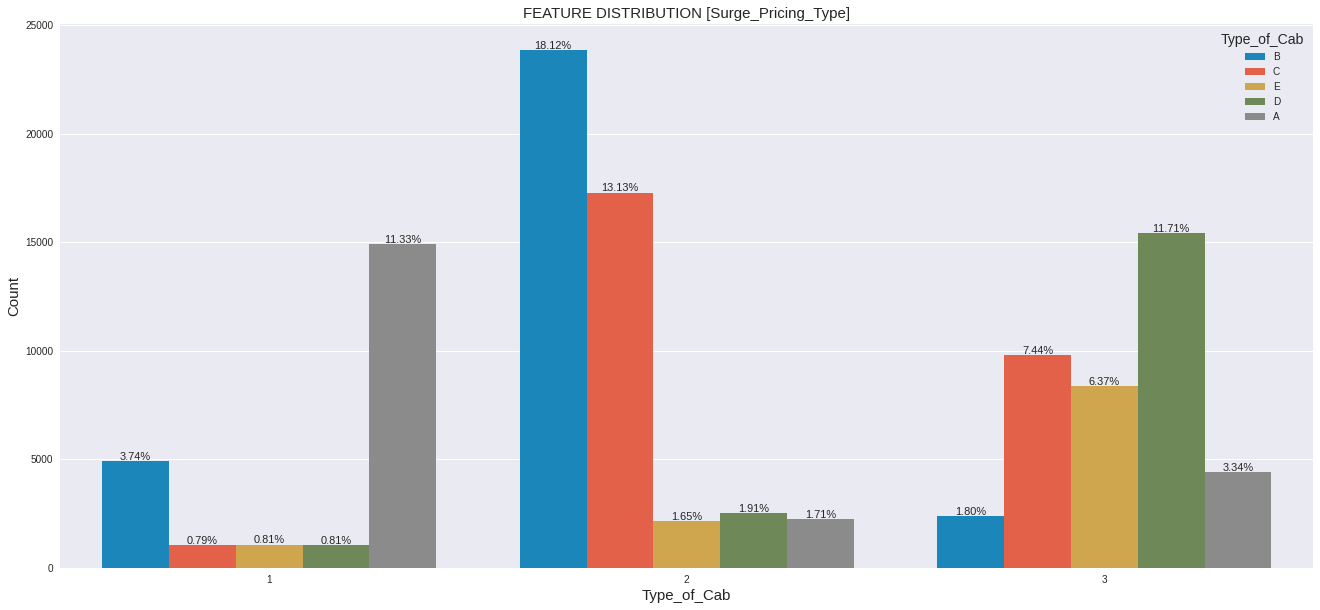

In [196]:
plt.subplots(1,1,figsize=(20,10)) 
plt.style.use('seaborn')
plt.style.use('fivethirtyeight') 
g = sns.countplot(x=data[~data.Surge_Pricing_Type.isnull()]['Surge_Pricing_Type'], data=data[~data.Surge_Pricing_Type.isnull()],hue='Type_of_Cab' )

g.set_title("FEATURE DISTRIBUTION [Surge_Pricing_Type]", fontsize = 15)
g.set_xlabel("Type_of_Cab", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data[~data.Surge_Pricing_Type.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

In [0]:
### for Surge_Pricing_Type = 1 we will replace Type_of_Cab with values A
### for Surge_Pricing_Type = 2 we will replace Type_of_Cab with values B
### for Surge_Pricing_Type = 3 we will replace Type_of_Cab with values D

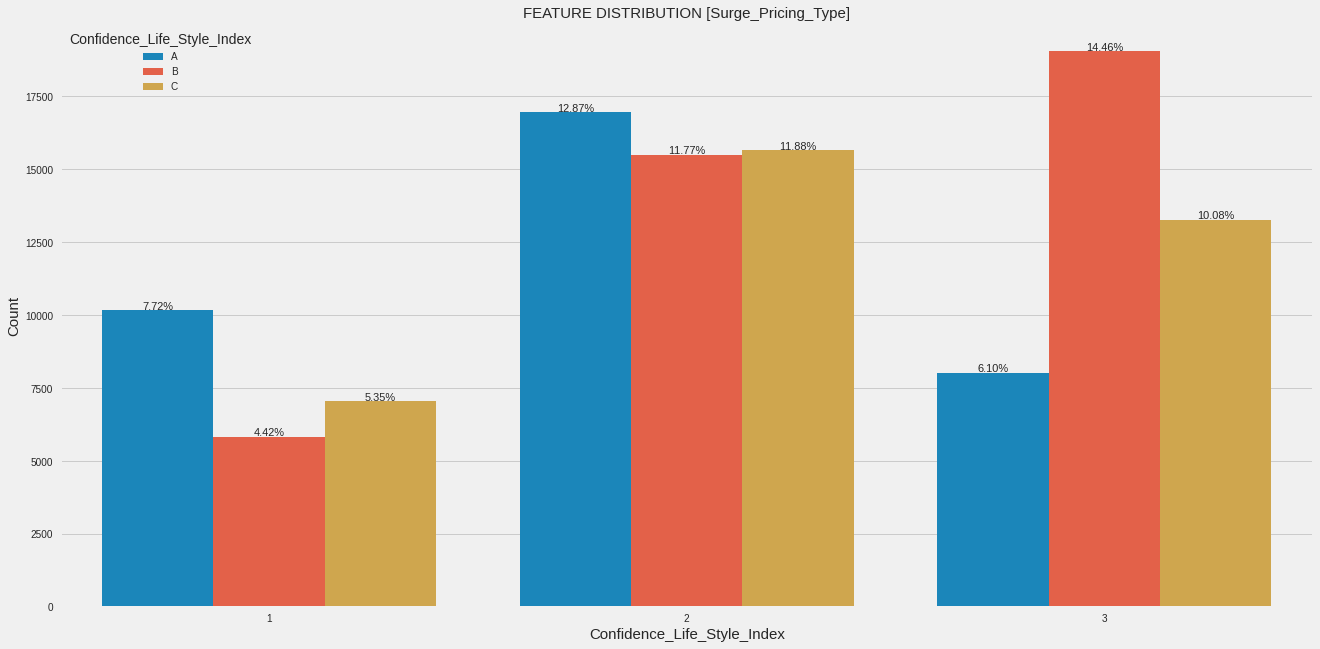

In [198]:
plt.subplots(1,1,figsize=(20,10)) 
plt.style.use('seaborn')
plt.style.use('fivethirtyeight') 
g = sns.countplot(x=data[~data.Surge_Pricing_Type.isnull()]['Surge_Pricing_Type'], data=data[~data.Surge_Pricing_Type.isnull()],hue='Confidence_Life_Style_Index' )

g.set_title("FEATURE DISTRIBUTION [Surge_Pricing_Type]", fontsize = 15)
g.set_xlabel("Confidence_Life_Style_Index", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data[~data.Surge_Pricing_Type.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

In [0]:
### for Surge_Pricing_Type = 1 we will replace Confidence_Life_Style_Index with values A
### for Surge_Pricing_Type = 2 we will replace Confidence_Life_Style_Index with values A
### for Surge_Pricing_Type = 3 we will replace Confidence_Life_Style_Index with values B

In [200]:
data[col_cat].shape

(131662, 4)

In [201]:
data[col_cat].head(4)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,B,A,A,Female
1,B,B,A,Male
2,NaN,NaN,E,Male
3,C,NaN,A,Male


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        131662 non-null  float64
 4   Life_Style_Index             131662 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         131662 non-null  float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [203]:
data.Surge_Pricing_Type.unique()

array([2, 3, 1])

In [204]:
data['Surge_Pricing_Type'].apply(type).value_counts()

<class 'int'>    131662
Name: Surge_Pricing_Type, dtype: int64

In [205]:
data.Type_of_Cab.unique()

array(['B', nan, 'C', 'E', 'D', 'A'], dtype=object)

In [206]:
data['Type_of_Cab'].apply(type).value_counts()

<class 'str'>      111452
<class 'float'>     20210
Name: Type_of_Cab, dtype: int64

In [207]:
data['Type_of_Cab'].apply(type).value_counts()

<class 'str'>      111452
<class 'float'>     20210
Name: Type_of_Cab, dtype: int64

In [0]:
data['Type_of_Cab'] = data['Type_of_Cab'].astype('str')

In [0]:
data.loc[data['Surge_Pricing_Type']==1,'Type_of_Cab'] = data.loc[data['Surge_Pricing_Type']==1,'Type_of_Cab'].apply(lambda x: str(x.replace('nan', 'A')) if isinstance(x, str) else x).astype(str)
data.loc[data['Surge_Pricing_Type']==2,'Type_of_Cab'] = data.loc[data['Surge_Pricing_Type']==2,'Type_of_Cab'].apply(lambda x: str(x.replace('nan', 'B')) if isinstance(x, str) else x).astype(str)
data.loc[data['Surge_Pricing_Type']==3,'Type_of_Cab'] = data.loc[data['Surge_Pricing_Type']==3,'Type_of_Cab'].apply(lambda x: str(x.replace('nan', 'D')) if isinstance(x, str) else x).astype(str)

In [210]:
data.Type_of_Cab.unique()

array(['B', 'C', 'E', 'D', 'A'], dtype=object)

In [0]:
############################################################################################

In [212]:
data['Confidence_Life_Style_Index'].apply(type).value_counts()

<class 'str'>      111469
<class 'float'>     20193
Name: Confidence_Life_Style_Index, dtype: int64

In [213]:
data.Confidence_Life_Style_Index.unique()

array(['A', 'B', nan, 'C'], dtype=object)

In [214]:
data['Confidence_Life_Style_Index'].apply(type).value_counts()

<class 'str'>      111469
<class 'float'>     20193
Name: Confidence_Life_Style_Index, dtype: int64

In [0]:
data['Confidence_Life_Style_Index'] = data['Confidence_Life_Style_Index'].astype('str')

In [0]:
data.loc[data['Surge_Pricing_Type']==1,'Confidence_Life_Style_Index'] = data.loc[data['Surge_Pricing_Type']==1,'Confidence_Life_Style_Index'].apply(lambda x: str(x.replace('nan', 'A')) if isinstance(x, str) else x).astype(str)
data.loc[data['Surge_Pricing_Type']==2,'Confidence_Life_Style_Index'] = data.loc[data['Surge_Pricing_Type']==2,'Confidence_Life_Style_Index'].apply(lambda x: str(x.replace('nan', 'A')) if isinstance(x, str) else x).astype(str)
data.loc[data['Surge_Pricing_Type']==3,'Confidence_Life_Style_Index'] = data.loc[data['Surge_Pricing_Type']==3,'Confidence_Life_Style_Index'].apply(lambda x: str(x.replace('nan', 'B')) if isinstance(x, str) else x).astype(str)

In [217]:
data.Confidence_Life_Style_Index.unique()

array(['A', 'B', 'C'], dtype=object)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  131662 non-null  object 
 3   Customer_Since_Months        131662 non-null  float64
 4   Life_Style_Index             131662 non-null  float64
 5   Confidence_Life_Style_Index  131662 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         131662 non-null  float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [219]:
col_int = data.drop(columns=['Trip_ID','Surge_Pricing_Type'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['Trip_ID']
col_tgt = ['Surge_Pricing_Type']
col_cat = data.drop(columns=['Trip_ID','Surge_Pricing_Type'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

14
8 4 1 1


(None, None)

In [0]:
data[col_cat] = data[col_cat].astype('category')

In [221]:
data[col_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Type_of_Cab                  131662 non-null  category
 1   Confidence_Life_Style_Index  131662 non-null  category
 2   Destination_Type             131662 non-null  category
 3   Gender                       131662 non-null  category
dtypes: category(4)
memory usage: 515.6 KB


In [0]:
###################################################### ********* LABEL ENCODING OF CATEGORICAL COLUMNS ********************** ############################### 
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
  
i=0
col_d = ['category','parent_company','fund_name','investment_class','fund_size']
#for i in range(len(col_d)):
  #data[col_d[i]]= label_encoder.fit_transform(data[col_d[i]])

In [223]:
###################################################### ********* ONE HOT ENCODING [get dummeies ] OF CATEGORICAL COLUMNS ********************** ###############################

i=0
col_d = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']
for i in range(len(col_d)):
  unq = data[col_d[i]].nunique()
  print("number of unique values for columns ", col_d[i] ," are:- ",unq)
  data = pd.concat([data,pd.get_dummies(data[col_d[i]],  prefix=col_d[i],dummy_na=False)],axis=1)
  #data.drop(columns=col_d[i],axis=1,inplace=True)

number of unique values for columns  Type_of_Cab  are:-  5
number of unique values for columns  Confidence_Life_Style_Index  are:-  3
number of unique values for columns  Destination_Type  are:-  14
number of unique values for columns  Gender  are:-  2


In [0]:
data.drop(columns=['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender'],axis=1,inplace=True)

In [225]:
data.columns

Index(['Trip_ID', 'Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C',
       'Type_of_Cab_D', 'Type_of_Cab_E', 'Confidence_Life_Style_Index_A',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Destination_Type_A', 'Destination_Type_B', 'Destination_Type_C',
       'Destination_Type_D', 'Destination_Type_E', 'Destination_Type_F',
       'Destination_Type_G', 'Destination_Type_H', 'Destination_Type_I',
       'Destination_Type_J', 'Destination_Type_K', 'Destination_Type_L',
       'Destination_Type_M', 'Destination_Type_N', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [226]:
data.sample(4)

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
94360,T0005846567,15.86,5.0,2.79509,1.43375,1,64.202698,48,77,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
52073,T0005776175,62.49,10.0,2.99726,2.57625,0,38.000000,51,73,3,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49872,T0005772486,16.35,4.0,2.50280,2.69250,3,85.000000,45,61,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
112714,T0005877050,26.43,1.0,2.64491,3.80625,0,64.202698,47,64,3,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [227]:
####################################### CHECKING and Removing THE highly ************ CORREALATED COLUMNS ***************** ##########################################
correlated_features = set()
correlation_matrix = data.drop(columns=['Trip_ID','Surge_Pricing_Type'],axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

data.drop(columns=correlated_features,axis=1,inplace=True)

print(data.shape)

1
{'Gender_Male'}
(131662, 33)


In [228]:
data.sample(4)

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female
9907,T0005705773,18.18,10.0,2.388400,3.99750,0,64.202698,46,56,2,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91737,T0005842209,28.64,8.0,2.549220,3.58750,0,64.202698,48,89,2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36516,T0005750126,9.90,4.0,2.802064,3.78125,0,49.000000,44,54,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
47761,T0005768895,38.35,8.0,3.178600,4.06250,0,43.000000,53,71,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [229]:
data.isnull().sum().sum()

0

In [230]:
col_int = data.drop(columns=['Trip_ID','Surge_Pricing_Type'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['Trip_ID']
col_tgt = ['Surge_Pricing_Type']
col_cat = data.drop(columns=['Trip_ID','Surge_Pricing_Type'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

33
31 0 1 1


(None, None)

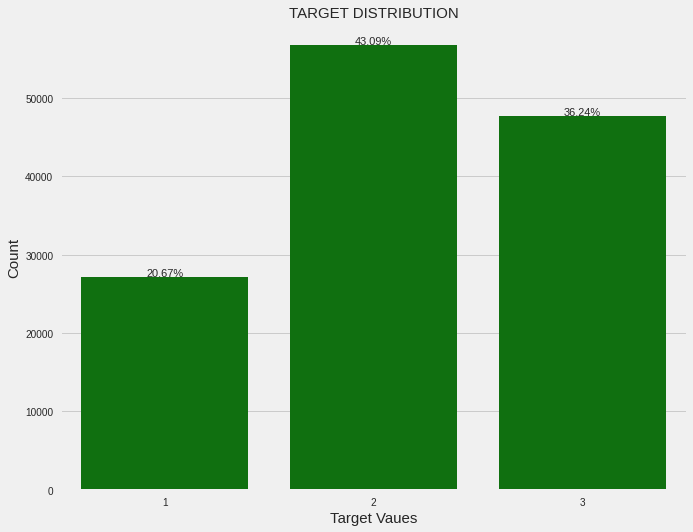

In [231]:
####################################################### ******** CLASS IMBALANCE [ SMOTE ] ************ ##############################################

plt.subplots(1,1,figsize=(10,8)) 
plt.style.use('seaborn')
g = sns.countplot(x= data[~data.Surge_Pricing_Type.isnull()]['Surge_Pricing_Type'], data= data[~data.Surge_Pricing_Type.isnull()], color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 15)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len( data[~data.Surge_Pricing_Type.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

In [232]:
# Use SMOTE to oversample the minority classes
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
y = data[~data.Surge_Pricing_Type.isnull()]['Surge_Pricing_Type']
X = data[~data.Surge_Pricing_Type.isnull()][col_int]  
print(X.shape)


X_sm, y_sm = sm.fit_sample(X, y)
# Count the number of occurences in the y_train sets to ensure that the oversampling worked 

print(y_sm.shape,X_sm.shape)

data_smote = pd.concat([pd.DataFrame(X_sm,columns=col_int),pd.DataFrame(y_sm,columns=['Surge_Pricing_Type'])],axis=1) #,data[~data.greatstone_rating.isnull()][col_id]
data_smote.shape 

(131662, 31)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(170184,) (170184, 31)


(170184, 32)

In [233]:
data_smote.sample(4)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Surge_Pricing_Type
157490,25.396218,4.78695,2.696918,3.193865,0.21305,64.202698,47.78695,64.78695,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.78695,0.0,0.0,0.21305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
16403,38.990000,8.00000,2.810130,2.833750,0.00000,60.000000,58.00000,81.00000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18427,12.620000,0.00000,2.543360,3.020000,0.00000,64.202698,49.00000,65.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
53459,47.020000,3.00000,2.802064,2.593750,0.00000,64.202698,69.00000,96.00000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


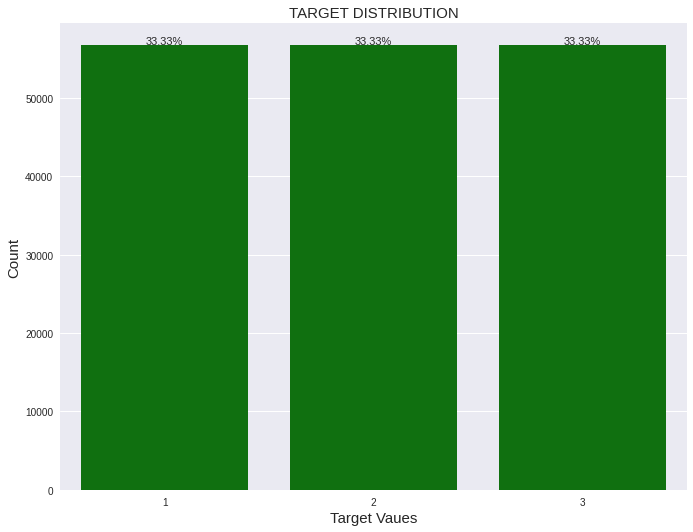

In [234]:
plt.subplots(1,1,figsize=(10,8)) 
plt.style.use('seaborn')
g = sns.countplot(x= data_smote[~data_smote.Surge_Pricing_Type.isnull()]['Surge_Pricing_Type'], data= data_smote[~data_smote.Surge_Pricing_Type.isnull()], color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 15)
g.set_xlabel("Target Vaues", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len( data_smote[~data_smote.Surge_Pricing_Type.isnull()])*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()

In [235]:
data = pd.concat([data_smote,data[data.Surge_Pricing_Type.isnull()].drop(columns=col_id)],axis=0)
data.shape

(170184, 32)

In [236]:
col_int = data.drop(columns=['Surge_Pricing_Type'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['Trip_ID']
col_tgt = ['Surge_Pricing_Type']
col_cat = data.drop(columns=['Surge_Pricing_Type'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

33
31 0 1 1


(None, None)

In [237]:
data.sample(4)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Surge_Pricing_Type
115804,99.350000,10.0,2.862210,3.737500,0.000000,47.000000,46.000000,58.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
83564,45.640000,8.0,2.745790,2.031250,1.000000,64.202698,59.000000,86.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23862,76.860000,10.0,3.083100,2.447500,0.000000,64.202698,45.000000,70.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
137154,107.834697,10.0,3.225593,3.891705,0.244327,64.202698,49.488654,79.755673,1.0,0.0,0.0,0.0,0.0,0.0,0.244327,0.755673,0.755673,0.0,0.0,0.244327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [238]:
reduce_mem_usage(data)

Memory usage of dataframe is 42.85 MB
Memory usage after optimization is: 11.52 MB
Decreased by 73.1%


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Surge_Pricing_Type
0,6.769531,1.000000,2.427734,3.904297,0.000000,40.00000,46.00000,60.00000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.00000,0.00000,1.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2
1,29.468750,10.000000,2.783203,3.449219,0.000000,38.00000,56.00000,78.00000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,1.00000,0.00000,1.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
2,41.593750,10.000000,2.802734,3.501953,2.000000,64.18750,56.00000,77.00000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.00000,0.00000,0.000000,0.0,0.000000,0.00000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
3,61.562500,10.000000,2.802734,3.453125,0.000000,64.18750,52.00000,74.00000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.00000,0.00000,1.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
4,54.937500,10.000000,3.035156,3.402344,4.000000,51.00000,49.00000,102.00000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.00000,0.00000,1.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170179,106.937500,10.000000,2.945312,2.080078,1.722656,33.12500,53.87500,89.75000,0.000000,0.0,0.861328,0.138794,0.000000,0.0,1.00000,0.00000,1.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138794,3
170180,53.000000,5.457031,2.845703,4.347656,1.084961,89.62500,49.09375,78.93750,0.000000,0.0,0.457520,0.542480,0.000000,0.0,0.54248,0.45752,0.000000,0.0,0.542480,0.45752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.542480,3
170181,52.937500,3.794922,2.757812,1.629883,1.000000,32.90625,51.09375,75.00000,0.000000,0.0,0.000000,0.896973,0.102844,0.0,0.00000,1.00000,0.896973,0.0,0.102844,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3
170182,62.468750,6.847656,2.679688,3.419922,3.580078,64.18750,44.00000,55.84375,0.580566,0.0,0.419434,0.000000,0.000000,0.0,1.00000,0.00000,0.580566,0.0,0.419434,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.580566,3


In [0]:
data.to_csv('/gdrive/My Drive/Hackathon/Analyticsvidya-JanataHack Mobility Analytics/Raw Files/data.csv',index=False)

data_bkp['Trip_ID'].to_csv('/gdrive/My Drive/Hackathon/Analyticsvidya-JanataHack Mobility Analytics/Raw Files/data_id.csv',index=False)

In [240]:
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-17 23:11:07.850480+05:30


## **TEST DATA**

In [0]:
test_df = pd.read_csv(io.BytesIO(uploaded1['test_VsU9xXK.csv']))

In [0]:
test_df_bkp=test_df.copy(deep=True)

In [0]:
#test_df = pd.read_csv('/gdrive/My Drive/Hackathon/Analyticsvidya-JanataHack Mobility Analytics/Raw Files/test_VsU9xXK.csv')#

In [244]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        83429 non-null  float64
 4   Life_Style_Index             74068 non-null  float64
 5   Confidence_Life_Style_Index  74068 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         40606 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

In [245]:
test_df.sample(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
45443,T0005803403,45.59,NaN,1.0,NaN,NaN,A,1.93250,3,NaN,48,77,Female
13341,T0005723188,60.37,A,NaN,NaN,NaN,A,3.82750,0,NaN,54,82,Male
41950,T0005794546,26.03,C,10.0,2.49676,A,B,2.05375,0,41.0,51,67,Female
37452,T0005783295,35.44,NaN,NaN,NaN,NaN,B,0.65750,3,53.0,57,83,Female
47039,T0005807398,17.34,A,2.0,2.62667,B,B,3.46125,0,NaN,49,68,Male


In [246]:
test_df.sample(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
84398,T0005901091,67.76,A,5.0,NaN,NaN,B,3.93000,1,99.0,48,71,Male
76903,T0005882133,37.15,NaN,5.0,NaN,NaN,A,4.02500,0,NaN,47,73,Male
68586,T0005861031,61.84,B,9.0,2.80945,B,A,4.06750,0,67.0,49,65,Male
48249,T0005810384,49.51,A,10.0,2.99272,B,A,1.69375,0,72.0,55,95,Female
3515,T0005698453,54.94,C,3.0,2.77783,B,E,0.80500,0,67.0,54,96,Female


In [0]:
test_df_bkp = test_df.copy(deep=True)

In [248]:
test_df.shape

(87395, 13)

In [0]:
### Finding the number of *****UNIQUE****** values and dropping columns and rows having same unique values
i=0
col_d = list(test_df.columns)
for i in range(len(col_d)):
  ## droping column wise
  unq = test_df[col_d[i]].nunique()
  if unq ==1:
    test_df.drop(columns=col_d[i],axis=1,inplace=True)   
    print("number unique values in column ,",col_d[i] ," are:-  ",unq)


i=0
row_d = test_df.shape[0]
for i in range(row_d):
  ## droping row wise
  unq = test_df.iloc[i,:].nunique()
  if unq == 1:
    test_df.drop(test_df.index[i],axis=0,inplace=True)
    print("number unique values in row index ,",i ," are:-  ",unq)

In [250]:
test_df.shape

(87395, 13)

In [0]:
### Finding the columns having  ***** NULL ****** values gretaer than the threshold and drop then column and row wise
threshold = 0.7
i=0
col_d = list(test_df.columns)
for i in range(len(col_d)):
  ## droping column wise
  unq = test_df[col_d[i]].isnull().sum()/test_df.shape[0]
  if unq > threshold:
    test_df.drop(columns=col_d[i],axis=1,inplace=True)   
    print("number unique values in column ,",col_d[i] ," are:-  ",unq)


i=0
row_d = test_df.shape[0]
for i in range(row_d):
  ## droping row wise
  unq = test_df.iloc[i,:].isnull().sum()/test_df.shape[0]
  if unq > threshold:
    test_df.drop(test_df.index[i],axis=0,inplace=True)
    print("% unique values in row index ,",i ," are:-  ",unq)

In [252]:
test_df.shape

(87395, 13)

In [253]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        83429 non-null  float64
 4   Life_Style_Index             74068 non-null  float64
 5   Confidence_Life_Style_Index  74068 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         40606 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

In [254]:
col_int = test_df.drop(columns=['Trip_ID'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['Trip_ID']
col_tgt = ['Surge_Pricing_Type']
col_cat = test_df.drop(columns=['Trip_ID'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

14
8 4 1 1


(None, None)

In [255]:
################## CHECKING and Removing THE highly   ***** CORRELATED COLUMNS ******  ###################################################
correlated_features = set()
correlation_matrix = test_df[col_int].corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

test_df.drop(columns=correlated_features,axis=1,inplace=True)

print(test_df.shape)

0
set()
(87395, 13)


In [256]:
test_df[col_int].isnull().sum()

Trip_Distance                   0
Customer_Since_Months        3966
Life_Style_Index            13327
Customer_Rating                 0
Cancellation_Last_1Month        0
Var1                        46789
Var2                            0
Var3                            0
dtype: int64

In [257]:
test_df[col_int].sample(5)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
46137,31.76,10.0,2.74945,3.40125,1,31.0,52,76
31129,6.47,10.0,2.93367,2.16750,1,NaN,47,113
12025,62.49,1.0,3.44793,3.48750,4,NaN,58,83
2761,47.75,5.0,3.08134,3.44000,1,NaN,48,85
46074,30.81,10.0,2.70609,2.81875,0,62.0,51,65


In [0]:
### Treating the  INT null values  

i=0
col_d = col_int
for i in range(len(col_d)):
  test_df[col_d[i]].fillna(np.mean(test_df[col_d[i]]),inplace=True)
  #unq = data_train[col_d[i]].isnull().sum()  
  #print("number of null values in column ,",col_d[i] ," are:-  ",unq)

In [259]:
test_df[col_int].isnull().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
dtype: int64

In [260]:
test_df[col_int].sample(5)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
87181,56.16,5.0,2.592170,3.5225,3,63.93661,48,60
40710,36.08,9.0,2.803392,3.7775,0,35.00000,50,73
65422,16.69,2.0,2.704180,2.9175,1,63.93661,59,82
19055,32.06,6.0,2.957900,3.3575,0,63.93661,54,81
76801,23.72,10.0,2.850490,4.1750,3,81.00000,47,84


In [261]:
############################### NEGATIVE VALUES ###########################################################

### Treating the INT negative values  - Training 

i=0
col_d = col_int
i=0
column = []
for i in range(len(col_d)):
  test_df[col_d[i]]  = test_df[col_d[i]].apply(lambda x : x*-1 if x<0 else x)
  unq = test_df[col_d[i]].loc[(test_df[col_d[i]]<0)].count()
  
  print("number negative values in column ,",col_d[i] ," are:-  ",unq)

number negative values in column , Trip_Distance  are:-   0
number negative values in column , Customer_Since_Months  are:-   0
number negative values in column , Life_Style_Index  are:-   0
number negative values in column , Customer_Rating  are:-   0
number negative values in column , Cancellation_Last_1Month  are:-   0
number negative values in column , Var1  are:-   0
number negative values in column , Var2  are:-   0
number negative values in column , Var3  are:-   0


In [262]:
test_df[col_cat].sample(3)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
76401,NaN,A,D,Male
17431,NaN,C,A,Female
70704,A,A,A,Female


In [263]:
test_df[col_cat].isnull().sum()

Type_of_Cab                    13158
Confidence_Life_Style_Index    13327
Destination_Type                   0
Gender                             0
dtype: int64

In [264]:
test_df[col_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Type_of_Cab                  74237 non-null  object
 1   Confidence_Life_Style_Index  74068 non-null  object
 2   Destination_Type             87395 non-null  object
 3   Gender                       87395 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [265]:
col_tgt

['Surge_Pricing_Type']

In [0]:
### for Surge_Pricing_Type = 1 we will replace Confidence_Life_Style_Index with values A
### for Surge_Pricing_Type = 2 we will replace Confidence_Life_Style_Index with values A
### for Surge_Pricing_Type = 3 we will replace Confidence_Life_Style_Index with values B

In [267]:
test_df[col_cat].shape

(87395, 4)

In [268]:
test_df[col_cat].head(4)

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,A,A,B,Male
1,B,A,A,Female
2,C,A,D,Male
3,NaN,C,E,Male


In [269]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        87395 non-null  float64
 4   Life_Style_Index             87395 non-null  float64
 5   Confidence_Life_Style_Index  74068 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         87395 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

In [270]:
test_df.Type_of_Cab.unique()

array(['A', 'B', 'C', nan, 'E', 'D'], dtype=object)

In [271]:
test_df['Type_of_Cab'].apply(type).value_counts()

<class 'str'>      74237
<class 'float'>    13158
Name: Type_of_Cab, dtype: int64

In [272]:
test_df['Type_of_Cab'].apply(type).value_counts()

<class 'str'>      74237
<class 'float'>    13158
Name: Type_of_Cab, dtype: int64

In [273]:
test_df.Type_of_Cab.value_counts()

B    20449
C    18610
A    14309
D    12894
E     7975
Name: Type_of_Cab, dtype: int64

In [0]:
test_df['Type_of_Cab'] = test_df['Type_of_Cab'].astype('str')

In [275]:
test_df.Type_of_Cab.value_counts()

B      20449
C      18610
A      14309
nan    13158
D      12894
E       7975
Name: Type_of_Cab, dtype: int64

In [0]:
#test_df.loc[:,'Type_of_Cab'] = test_df.loc[:,'Type_of_Cab'].apply(lambda x: str(x.replace('nan', 'others')) if isinstance(x, str) else x).astype(str)
test_df.loc[:,'Type_of_Cab'] = test_df.loc[:,'Type_of_Cab'].apply(lambda x: str(x.replace('nan', 'B')) if isinstance(x, str) else x).astype(str)



In [277]:
test_df.Type_of_Cab.value_counts()

B    33607
C    18610
A    14309
D    12894
E     7975
Name: Type_of_Cab, dtype: int64

In [278]:
test_df.Type_of_Cab.unique()

array(['A', 'B', 'C', 'E', 'D'], dtype=object)

In [0]:
############################################################################################

In [280]:
test_df.Confidence_Life_Style_Index.unique()

array(['A', 'C', nan, 'B'], dtype=object)

In [281]:
test_df['Confidence_Life_Style_Index'].apply(type).value_counts()

<class 'str'>      74068
<class 'float'>    13327
Name: Confidence_Life_Style_Index, dtype: int64

In [282]:
test_df['Confidence_Life_Style_Index'].apply(type).value_counts()

<class 'str'>      74068
<class 'float'>    13327
Name: Confidence_Life_Style_Index, dtype: int64

In [283]:
test_df.Confidence_Life_Style_Index.value_counts()

B    26910
C    23769
A    23389
Name: Confidence_Life_Style_Index, dtype: int64

In [0]:
test_df['Confidence_Life_Style_Index'] = test_df['Confidence_Life_Style_Index'].astype('str')

In [285]:
test_df.Confidence_Life_Style_Index.value_counts()

B      26910
C      23769
A      23389
nan    13327
Name: Confidence_Life_Style_Index, dtype: int64

In [0]:
#test_df.loc[:,'Type_of_Cab'] = test_df.loc[:,'Type_of_Cab'].apply(lambda x: str(x.replace('nan', 'others')) if isinstance(x, str) else x).astype(str)
test_df.loc[:,'Confidence_Life_Style_Index'] = test_df.loc[:,'Confidence_Life_Style_Index'].apply(lambda x: str(x.replace('nan', 'B')) if isinstance(x, str) else x).astype(str)



In [287]:
test_df.Confidence_Life_Style_Index.value_counts()

B    40237
C    23769
A    23389
Name: Confidence_Life_Style_Index, dtype: int64

In [288]:
test_df.Confidence_Life_Style_Index.unique()

array(['A', 'C', 'B'], dtype=object)

In [289]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  87395 non-null  object 
 3   Customer_Since_Months        87395 non-null  float64
 4   Life_Style_Index             87395 non-null  float64
 5   Confidence_Life_Style_Index  87395 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         87395 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

In [290]:
col_int = test_df.drop(columns=['Trip_ID'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['Trip_ID']
col_tgt = ['Surge_Pricing_Type']
col_cat = test_df.drop(columns=['Trip_ID'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

14
8 4 1 1


(None, None)

In [0]:
test_df[col_cat] = test_df[col_cat].astype('category')

In [292]:
test_df[col_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Type_of_Cab                  87395 non-null  category
 1   Confidence_Life_Style_Index  87395 non-null  category
 2   Destination_Type             87395 non-null  category
 3   Gender                       87395 non-null  category
dtypes: category(4)
memory usage: 342.6 KB


In [0]:
###################################################### ********* LABEL ENCODING OF CATEGORICAL COLUMNS ********************** ############################### 
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
  
i=0
col_d = ['category','parent_company','fund_name','investment_class','fund_size']
#for i in range(len(col_d)):
  #data[col_d[i]]= label_encoder.fit_transform(data[col_d[i]])

In [294]:
###################################################### ********* ONE HOT ENCODING [get dummeies ] OF CATEGORICAL COLUMNS ********************** ###############################

i=0
col_d = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']
for i in range(len(col_d)):
  unq = test_df[col_d[i]].nunique()
  print("number of unique values for columns ", col_d[i] ," are:- ",unq)
  test_df = pd.concat([test_df,pd.get_dummies(test_df[col_d[i]],  prefix=col_d[i],dummy_na=False)],axis=1)
  #data.drop(columns=col_d[i],axis=1,inplace=True)

number of unique values for columns  Type_of_Cab  are:-  5
number of unique values for columns  Confidence_Life_Style_Index  are:-  3
number of unique values for columns  Destination_Type  are:-  14
number of unique values for columns  Gender  are:-  2


In [0]:
test_df.drop(columns=['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender'],axis=1,inplace=True)

In [296]:
test_df.columns

Index(['Trip_ID', 'Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Confidence_Life_Style_Index_A',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Destination_Type_A', 'Destination_Type_B', 'Destination_Type_C',
       'Destination_Type_D', 'Destination_Type_E', 'Destination_Type_F',
       'Destination_Type_G', 'Destination_Type_H', 'Destination_Type_I',
       'Destination_Type_J', 'Destination_Type_K', 'Destination_Type_L',
       'Destination_Type_M', 'Destination_Type_N', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [297]:
test_df.sample(4)

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
31875,T0005769409,40.70,7.0,2.73434,2.39500,0,77.00000,46,70,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4916,T0005701979,50.20,10.0,2.57707,3.75125,0,63.93661,46,62,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3267,T0005697849,45.18,6.0,2.61535,2.32500,1,63.93661,49,67,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
58259,T0005835316,36.16,7.0,2.88733,2.81000,0,107.00000,45,60,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [298]:
test_df.sample(4)

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
79701,T0005889223,26.38,7.0,2.46607,3.23000,2,63.93661,49,67,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
85746,T0005904467,9.01,10.0,2.67618,2.90875,0,63.93661,49,71,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
663,T0005691161,93.06,1.0,2.99729,3.17750,5,63.93661,50,74,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16720,T0005731516,61.04,2.0,2.99978,3.41125,0,63.93661,59,84,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [299]:
test_df.isnull().sum().sum()

0

In [300]:
col_int = test_df.drop(columns=['Trip_ID'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['Trip_ID']
col_tgt = ['Surge_Pricing_Type']
col_cat = test_df.drop(columns=['Trip_ID'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

34
32 0 1 1


(None, None)

In [301]:
reduce_mem_usage(test_df)

Memory usage of dataframe is 8.00 MB
Memory usage after optimization is: 8.67 MB
Decreased by -8.3%


,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
0,T0005689459,9.437500,10.0,2.574219,3.679688,2,63.9375,46,63,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,T0005689462,32.156250,10.0,2.851562,1.593750,0,65.0000,49,80,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,T0005689463,10.382812,4.0,2.705078,4.503906,0,63.9375,47,74,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,T0005689466,14.937500,6.0,2.482422,4.531250,0,63.0000,43,54,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,T0005689468,32.031250,7.0,2.816406,4.601562,3,96.0000,44,56,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87390,T0005908503,29.437500,3.0,2.406250,0.997559,0,74.0000,48,72,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87391,T0005908504,14.828125,10.0,2.570312,4.742188,0,109.0000,42,60,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87392,T0005908505,37.875000,6.0,3.082031,1.634766,0,63.9375,57,77,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87393,T0005908511,10.632812,1.0,2.802734,2.599609,1,107.0000,51,77,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [302]:
####################################### CHECKING and Removing THE highly ************ CORREALATED COLUMNS ***************** ##########################################
correlated_features = set()
correlation_matrix = test_df.drop(columns=['Trip_ID'],axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

test_df.drop(columns=correlated_features,axis=1,inplace=True)

print(test_df.shape)

1
{'Gender_Male'}
(87395, 32)


In [0]:

test_df.to_csv('/gdrive/My Drive/Hackathon/Analyticsvidya-JanataHack Mobility Analytics/Raw Files/test_df.csv',index=False)


In [304]:
print(data.shape,test_df.shape)

(170184, 32) (87395, 32)


In [305]:
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)

2020-05-17 23:12:27.603478+05:30


In [306]:
data.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Confidence_Life_Style_Index_A',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Destination_Type_A', 'Destination_Type_B', 'Destination_Type_C',
       'Destination_Type_D', 'Destination_Type_E', 'Destination_Type_F',
       'Destination_Type_G', 'Destination_Type_H', 'Destination_Type_I',
       'Destination_Type_J', 'Destination_Type_K', 'Destination_Type_L',
       'Destination_Type_M', 'Destination_Type_N', 'Gender_Female',
       'Surge_Pricing_Type'],
      dtype='object')

# **MODEL TRAINING ON BEST MODEL**

In [313]:
###############################################################  KFOLD VALIDATION STRATIFIED ######################################################################

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
  

data_train = data[~data.Surge_Pricing_Type.isnull()]
data_tst = data[data.Surge_Pricing_Type.isnull()]
data_train.shape

(170184, 32)

In [314]:
col_int = data.drop(columns=['Surge_Pricing_Type'],axis=1).select_dtypes(exclude=('category','object')).columns
col_id = ['Trip_ID']
col_tgt = ['Surge_Pricing_Type']
col_cat = data.drop(columns=['Surge_Pricing_Type'],axis=1).select_dtypes(include=('category','object')).columns
print(len(col_int)+len(col_id)+len(col_tgt)+len(col_cat)),print(len(col_int),len(col_cat),len(col_id),len(col_tgt))

33
31 0 1 1


(None, None)

In [315]:
import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)


X_0 = data_train[col_int]      
y_0 = data_train[col_tgt]

cvscore_train = []
cvscore_test = []

np.random.seed(7)
kfold = StratifiedKFold(n_splits=3,random_state=None)
#kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=21312)

2020-05-17 23:14:25.884582+05:30


In [324]:
################################################################################################################################################################
model_OVRC = OneVsRestClassifier(XGBClassifier()) # OneVsOneClassifier ,OneVsRestClassifier
for train, test in kfold.split(X_0, y_0):
        X_train = X_0.iloc[train,:]
        X_test = X_0.iloc[test,:]
        X_train_minmax_0 = mm_scaler.fit_transform(X_train)
        X_valid_minmax_0 = mm_scaler.fit_transform(X_test)
        #print(X_train_minmax_0.shape[1])
        y_train_0 = y_0.iloc[train,:]
        y_valid_0 = y_0.iloc[test,:]
        y_train_0 = y_train_0.values.ravel()
        y_valid_0 = y_valid_0.values.ravel()

        # X_train_0,X_valid_0,y_train_0,y_valid_0 = train_test_split(X_0,y_0,test_size=0.3,random_state=576)
        #print("TRAIN:", train, "TEST:", test)
        print(X_train_minmax_0.shape,y_train_0.shape,X_valid_minmax_0.shape,y_valid_0.shape)

        print("\n")
        model_OVRC.fit(X_train_minmax_0, y_train_0)
        print("for the model  train score is {} and test score is {}".format(model_OVRC.score(X_train_minmax_0, y_train_0),model_OVRC.score(X_valid_minmax_0, y_valid_0)))
        cvscore_train.append(model_OVRC.score(X_train_minmax_0, y_train_0))
        cvscore_test.append(model_OVRC.score(X_valid_minmax_0, y_valid_0))

print("Mean Accuracy (+/- Std Dev):-  %.2f%% (+/- %.2f%%)" % (np.mean(cvscore_test), np.std(cvscore_test)))


import pytz
from datetime import datetime
# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Kolkata')
your_now = now.astimezone(tz)
print (your_now)



(113456, 31) (113456,) (56728, 31) (56728,)


for the model  train score is 0.849007544775067 and test score is 0.7579325906078127
(113456, 31) (113456,) (56728, 31) (56728,)


for the model  train score is 0.8238524185587365 and test score is 0.8100232689324496
(113456, 31) (113456,) (56728, 31) (56728,)


for the model  train score is 0.7958327457340291 and test score is 0.788076434917501
Mean Accuracy (+/- Std Dev):-  0.78% (+/- 0.02%)
2020-05-17 23:22:47.755064+05:30


# **MODEL PREDICTIONS ON TEST DATA**

In [0]:
####################################################***** PREDICTIONS ********############################################################################

In [325]:
test_df

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female
0,T0005689459,9.437500,10.0,2.574219,3.679688,2,63.9375,46,63,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,T0005689462,32.156250,10.0,2.851562,1.593750,0,65.0000,49,80,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,T0005689463,10.382812,4.0,2.705078,4.503906,0,63.9375,47,74,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,T0005689466,14.937500,6.0,2.482422,4.531250,0,63.0000,43,54,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,T0005689468,32.031250,7.0,2.816406,4.601562,3,96.0000,44,56,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87390,T0005908503,29.437500,3.0,2.406250,0.997559,0,74.0000,48,72,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87391,T0005908504,14.828125,10.0,2.570312,4.742188,0,109.0000,42,60,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87392,T0005908505,37.875000,6.0,3.082031,1.634766,0,63.9375,57,77,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87393,T0005908511,10.632812,1.0,2.802734,2.599609,1,107.0000,51,77,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data_tst_minmax_0 = mm_scaler.fit_transform(test_df.drop(columns='Trip_ID',axis=1))

model_OVRC_predict = model_OVRC.predict(data_tst_minmax_0)

In [327]:
prediction = pd.DataFrame(model_OVRC_predict,columns=['Surge_Pricing_Type'])

print("prediction.isnull() :- ", prediction.isnull().sum())

prediction.isnull() :-  Surge_Pricing_Type    0
dtype: int64


In [328]:
prediction_df = prediction.reset_index().groupby('Surge_Pricing_Type').count().reset_index().rename(columns={'index':'count'}).sort_values(by='Surge_Pricing_Type',ascending=True)
prediction_df

,Surge_Pricing_Type,count
0,1,13711
1,2,46586
2,3,27098


In [0]:
df = pd.concat([test_df['Trip_ID'],prediction],axis=1)

In [0]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

def create_download_link(df, title = "Download CSV file", filename = "submission.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [331]:
create_download_link(df)